# Proyecto Final aprendizaje Supervisado

Librerias

In [1]:
############################## Importar Librerías ##############################

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Estadísticos
# ==============================================================================
import scipy.stats  as stats

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")



2. Importación y revisión de los datos:


   Importe ambos sets. Dado que la fuente de datos proviene de la misma base,tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de los datos (numero de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [2]:
#cargar datos
# ==============================================================================

df_2009 = pd.read_csv("2009_1perc.csv")
df_2010 = pd.read_csv("2010_1perc.csv")

In [3]:
#verificar tipo de datos de las variables
# ==============================================================================
print(df_2009.info())
print()
print(df_2010.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(1), int64(19), object(92)
memory usage: 5.0+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: int64(17), object(95)
memory usage: 5.1+ MB
None


In [4]:
#Describe df_2009
# ==============================================================================
print(df_2009.describe())
print()
print(df_2009.describe(include = "object"))

          Unnamed: 0    year          pct       ser_num      datestop  \
count    5812.000000  5812.0  5812.000000   5812.000000  5.812000e+03   
mean   291666.632485  2009.0    69.051617   5769.119924  6.255350e+06   
std    167435.992474     0.0    32.846903   5524.955522  3.447243e+06   
min        52.000000  2009.0     1.000000      1.000000  1.012009e+06   
25%    147489.750000  2009.0    42.000000   1902.750000  3.172009e+06   
50%    292821.500000  2009.0    73.000000   4347.000000  6.142009e+06   
75%    436008.750000  2009.0   102.000000   7616.750000  9.192009e+06   
max    580847.000000  2009.0   123.000000  31694.000000  1.231201e+07   

          timestop       perobs      perstop  compyear  comppct       repcmd  \
count  5812.000000  5812.000000  5812.000000    5812.0   5812.0  5812.000000   
mean   1426.219202     2.665893     5.501893       0.0      0.0   252.115795   
std     736.239726     4.816704     5.922592       0.0      0.0   305.058678   
min       0.000000    

In [5]:
#Describe df_2010
# ==============================================================================
print(df_2010.describe())
print()
print(df_2010.describe(include = "object"))

          Unnamed: 0    year          pct       ser_num      datestop  \
count    6013.000000  6013.0  6013.000000   6013.000000  6.013000e+03   
mean   300156.684184  2010.0    68.213870   5629.246300  6.469452e+06   
std    173941.822364     0.0    33.218863   4764.331369  3.408437e+06   
min       135.000000  2010.0     1.000000      1.000000  1.012010e+06   
25%    147573.000000  2010.0    42.000000   2071.000000  3.302010e+06   
50%    299643.000000  2010.0    72.000000   4393.000000  6.182010e+06   
75%    450268.000000  2010.0   102.000000   8038.000000  9.262010e+06   
max    601281.000000  2010.0   123.000000  28078.000000  1.231201e+07   

          timestop       perobs      perstop  compyear  comppct       repcmd  \
count  6013.000000  6013.000000  6013.000000    6013.0   6013.0  6013.000000   
mean   1401.649426     2.643273     5.792283       0.0      0.0   234.886912   
std     752.702505    12.840711    12.383224       0.0      0.0   290.362984   
min       0.000000    

In [6]:
#Casos perdidos
# ==============================================================================
print(df_2009.isna().sum())
print()
print(df_2010.isna().sum())

Unnamed: 0    0
year          0
pct           0
ser_num       0
datestop      0
             ..
xcoord        0
ycoord        0
dettypcm      0
linecm        0
detailcm      0
Length: 112, dtype: int64

Unnamed: 0    0
year          0
pct           0
ser_num       0
datestop      0
             ..
xcoord        0
ycoord        0
dettypcm      0
linecm        0
detailcm      0
Length: 112, dtype: int64


In [7]:
######################### Comparar tipos de datos de df's  #########################

# Obtener los tipos de datos de cada DataFrame
# ==================================================================================
dtypes1 = df_2009.dtypes
dtypes2 = df_2010.dtypes

# Comparar los tipos de datos columna por columna
# ==================================================================================
diferentes = []
for columna in dtypes1.index:
    if dtypes1[columna] != dtypes2[columna]:
        diferentes.append(columna)

# Imprimir las columnas con tipos de datos diferentes
# ==================================================================================
if len(diferentes) == 0:
    print("Los tipos de datos son iguales en todas las columnas.")
else:
    print("Los tipos de datos son diferentes en las siguientes columnas:")
    for columna in diferentes:
        print(columna)

Los tipos de datos son diferentes en las siguientes columnas:
perobs
addrpct
linecm
detailcm


In [8]:
#Revisar el tipo de datos de variables no coincidentes
# ==================================================================================
print(f"perobs 2009: {df_2009['perobs'].dtype}, perobs 2010: {df_2010['perobs'].dtype}")
print(f"addrpct 2009: {df_2009['addrpct'].dtype}, addrpct 2010: {df_2010['addrpct'].dtype}")
print(f"linecm 2009: {df_2009['linecm'].dtype}, linecm 2010: {df_2010['linecm'].dtype}")
print(f"detailcm 2009: {df_2009['detailcm'].dtype}, detailcm 2010: {df_2010['detailcm'].dtype}")

perobs 2009: float64, perobs 2010: int64
addrpct 2009: int64, addrpct 2010: object
linecm 2009: int64, linecm 2010: object
detailcm 2009: int64, detailcm 2010: object


In [9]:
#Transformar todas las variables no concordantes en object
# ==================================================================================
df_2009['perobs'] = df_2009['perobs'].astype(object)
df_2010['perobs'] = df_2010['perobs'].astype(object)
df_2009['addrpct'] = df_2009['addrpct'].astype(object)
df_2010['addrpct'] = df_2010['addrpct'].astype(object)
df_2009['linecm'] = df_2009['linecm'].astype(object)
df_2010['linecm'] = df_2010['linecm'].astype(object)
df_2009['detailcm'] = df_2009['detailcm'].astype(object)
df_2010['detailcm'] = df_2010['detailcm'].astype(object)

In [10]:
#Concatenar ambos df
# ==================================================================================
df_consolidado = pd.concat([df_2009, df_2010], ignore_index=True)
df_consolidado.head(5)

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20


In [11]:
#Revisar el tipo de datos de variables no coincidentes
# ==================================================================================
print(f"perobs consolidado: {df_consolidado['perobs'].dtypes}")
print(f"addrpct consolidado: {df_consolidado['addrpct'].dtypes}")
print(f"linecm consolidado: {df_consolidado['linecm'].dtypes}")
print(f"detailcm consolidado: {df_consolidado['detailcm'].dtypes}")

perobs consolidado: object
addrpct consolidado: object
linecm consolidado: object
detailcm consolidado: object


In [12]:
#Castear a numeric
# ==================================================================================
df_consolidado['perobs'] = pd.to_numeric(df_consolidado["perobs"], errors='coerce')
df_consolidado['addrpct'] = pd.to_numeric(df_consolidado['addrpct'], errors='coerce')
df_consolidado['linecm'] = pd.to_numeric(df_consolidado['linecm'], errors='coerce')
df_consolidado['detailcm'] = pd.to_numeric(df_consolidado['detailcm'], errors='coerce')


Preprocesamiento de datos

In [13]:
#Filtrar categóricas
variables_categoricas = df_consolidado.select_dtypes(include=['object'])
variables_categoricas

,recstat,inout,trhsloc,crimsusp,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,...,aptnum,city,state,zip,sector,beat,post,xcoord,ycoord,dettypcm
0,A,O,P,CPW,P,Y,N,N,,N,...,,BRONX,,,G,7,,1013067,0238633,CM
1,A,O,P,BURG,P,Y,Y,N,,N,...,,QUEENS,,,J,,,1012043,0212157,CM
2,1,O,P,MISD,V,Y,N,N,,N,...,,BRONX,,,E,,,1017599,0240200,CM
3,A,O,P,MIS,P,Y,N,N,,N,...,,BROOKLYN,,,J,4,35,1002625,0183442,CM
4,A,O,P,CPW,P,Y,Y,N,,N,...,,QUEENS,,,H,,,1024535,0209890,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,1,O,H,MISD,P,Y,N,N,,N,...,,BROOKLYN,,,I,,,989382,155162,CM
11821,A,O,P,ROBBERY,R,Y,N,N,,N,...,,BROOKLYN,,,A,,,1012757,186018,CM
11822,A,O,P,GLA,P,Y,N,N,,Y,...,,STATEN IS,,,E,,,933868,138600,CM
11823,1,O,P,FELONY,P,Y,N,N,,N,...,,QUEENS,,,E,,,1014722,214388,CM


In [14]:
#Listar las que tienen entre 2 y 99 categorías
# ==================================================================================
valores_distintos = variables_categoricas.nunique()
var_filtradas = valores_distintos[(valores_distintos >= 2) & (valores_distintos <= 99)]
var_filtradas

recstat      2
inout        2
trhsloc      4
typeofid     4
explnstp     2
            ..
addrtyp      2
city         7
sector      19
beat        64
dettypcm     2
Length: 73, dtype: int64

In [15]:
#Revisar si las variables continen NA o " "
# ==================================================================================
print(df_consolidado["officrid"].isna().sum())
print(" "in df_consolidado["officrid"].values)
print(df_consolidado["offshld"].isna().sum())
print(" "in df_consolidado["offshld"].values)
print(df_consolidado["offverb"].isna().sum())
print(" "in df_consolidado["offverb"].values)
print(df_consolidado["sector"].isna().sum())
print(" "in df_consolidado["sector"].values)
print(df_consolidado["trhsloc"].isna().sum())
print(" "in df_consolidado["trhsloc"].values)
print(df_consolidado["beat"].isna().sum())
print(" "in df_consolidado["beat"].values)


0
True
0
True
0
True
0
True
0
True
0
True


In [16]:
#cambiar variables
# ==================================================================================
reemplazo = {" ": "N"}
df_consolidado["officrid"] = df_consolidado["officrid"].replace(reemplazo)
df_consolidado["offshld"] = df_consolidado["offshld"].replace(reemplazo)
df_consolidado["offverb"] = df_consolidado["offverb"].replace(reemplazo)

reemplazo_1 = {" ": "U"}
df_consolidado["sector"] = df_consolidado["sector"].replace(reemplazo_1)
df_consolidado["trhsloc"] = df_consolidado["trhsloc"].replace(reemplazo_1)
df_consolidado["beat"] = df_consolidado["beat"].replace(reemplazo_1)

3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [17]:
df_consolidado["meters"] = (df_consolidado["ht_feet"] + df_consolidado["ht_inch"])*0.3048

In [18]:
########################### Generar columnas month y year ##########################

# Convertir la columna 'Fecha' a formato datetime
# ==================================================================================
df_consolidado['datestop'] = pd.to_datetime(df_consolidado['datestop'] , format='%m%d%Y')

# Obtener columnas separadas de mes y año
# ==================================================================================
df_consolidado['Mes'] = df_consolidado['datestop'].dt.month
df_consolidado['Año'] = df_consolidado['datestop'].dt.year

# Mostrar el DataFrame resultante
# ==================================================================================
print(df_consolidado.head(5))

   Unnamed: 0  year  pct  ser_num   datestop  timestop recstat inout trhsloc  \
0      178048  2009   41     1779 2009-04-03       130       A     O       P   
1      498873  2009  108     5805 2009-10-29      1050       A     O       P   
2      463573  2009   43     8340 2009-10-06      1450       1     O       P   
3       43626  2009   77      932 2009-12-03      1843       A     O       P   
4      563921  2009  110    11224 2009-12-13      1655       A     O       P   

   perobs  ... beat  post   xcoord   ycoord dettypcm linecm detailcm  meters  \
0     1.0  ...    7        1013067  0238633       CM    1.0     20.0  4.2672   
1     3.0  ...    U        1012043  0212157       CM    1.0     14.0  3.0480   
2     1.0  ...    U        1017599  0240200       CM    1.0     20.0  2.7432   
3     5.0  ...    4    35  1002625  0183442       CM    1.0     24.0  3.0480   
4     3.0  ...    U        1024535  0209890       CM    1.0     20.0  3.3528   

  Mes   Año  
0   4  2009  
1  10  200

In [19]:
############################## Generar nuevo DataFrame #############################

#Crear lista con las variables a considerar
# ==================================================================================
variables = var_filtradas.index.tolist()
variables.append("Mes")
variables.append("meters")
variables.append("Año")
variables.append("age")

#Generar nuevo df solo con variables seleccionadas
# ==================================================================================
df_filtrado = df_consolidado[variables]

#Filtrar por edad
# ==================================================================================
df_filtrado = df_filtrado[(df_filtrado['age'] >= 18) & (df_filtrado['age'] <= 100)]

df_filtrado.head(5)

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,build,addrtyp,city,sector,beat,dettypcm,Mes,meters,Año,age
0,A,O,P,P,Y,N,N,N,Y,N,...,M,L,BRONX,G,7,CM,4,4.2672,2009,24
2,1,O,P,V,Y,N,N,N,N,N,...,M,L,BRONX,E,U,CM,10,2.7432,2009,21
3,A,O,P,P,Y,N,N,N,Y,N,...,T,L,BROOKLYN,J,4,CM,12,3.0480,2009,22
4,A,O,P,P,Y,Y,N,N,Y,N,...,M,L,QUEENS,H,U,CM,12,3.3528,2009,18
5,1,I,T,V,Y,N,N,N,N,I,...,M,L,MANHATTAN,F,16,CM,5,3.9624,2009,47


In [20]:
print("Descriptivo arstmade:")
print()
print(df_filtrado["arstmade"].describe()) #descriptivo variable
print("---------------------------------")
print("Frecuencia arstmade:")
print()
print(df_filtrado["arstmade"].value_counts()) #cantidad de registros por categoría

Descriptivo arstmade:

count     10078
unique        2
top           N
freq       9432
Name: arstmade, dtype: object
---------------------------------
Frecuencia arstmade:

N    9432
Y     646
Name: arstmade, dtype: int64


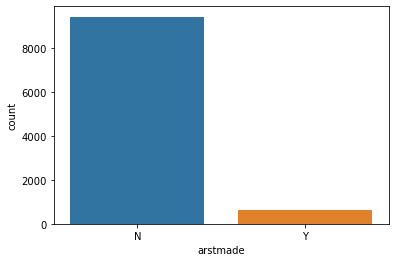

In [21]:
#gráfica de arstmade
# ==================================================================================
sns.countplot(df_filtrado["arstmade"])
plt.show()

4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

In [22]:
#Observar variable race
# ==================================================================================
print(df_filtrado["race"].describe()) #descriptivo variable
print()
print(df_filtrado["race"].value_counts()) #cantidad de registros por categoría

count     10078
unique        8
top           B
freq       5342
Name: race, dtype: object

B    5342
Q    2532
W     974
P     575
A     299
Z     250
U      69
I      37
Name: race, dtype: int64


In [23]:
############## Calcular coef de independencia chi cuadrado y V de Cramer ###########

# Calcular chi cuadrado
# ==================================================================================
race_arstmade = np.array(pd.crosstab(df_filtrado["race"], df_filtrado["arstmade"]))
X2 = round(stats.chi2_contingency(race_arstmade, correction=False) [0],5) #Obtención Chi cuadrado
p = round(stats.chi2_contingency(race_arstmade, correction=False) [1],5) #Obtención p_value prueba de indepencencias

# Calcular chi cuadrado
# ==================================================================================
n = np.sum(race_arstmade)
minDim = min(race_arstmade.shape)-1
V = round(np.sqrt((X2/n)/minDim),5) #cálculo V de Cramer

#Imprimir resultados
# ==================================================================================
print (f"La correlación Chi cuadrado entre Race y arstmade es de: {X2} con un p-value de: {p}")
print(f"El valor V de Cramer es de: {V}")

La correlación Chi cuadrado entre Race y arstmade es de: 4.87608 con un p-value de: 0.67508
El valor V de Cramer es de: 0.022


Considerando un $\alpha = 0.05$ no existe evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, no existe asociación entre las variables.

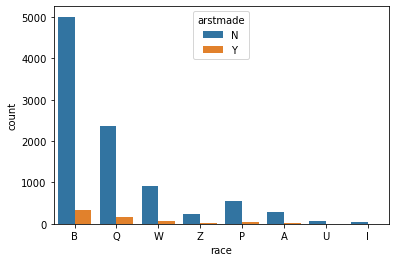

In [24]:
#gráfico de comportamiento
# ==================================================================================
sns.countplot(df_filtrado["race"], hue = df_filtrado["arstmade"])
plt.show()

4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

In [25]:
#Observar variable race
# ==================================================================================
print(df_filtrado["sex"].describe()) #descriptivo variable
print()
print(df_filtrado["sex"].value_counts()) #cantidad de registros por categoría

count     10078
unique        3
top           M
freq       9278
Name: sex, dtype: object

M    9278
F     650
Z     150
Name: sex, dtype: int64


In [26]:
############## Calcular coef de independencia chi cuadrado y V de Cramer ###########

# Calcular chi cuadrado
# ==================================================================================
sex_arstmade = np.array(pd.crosstab(df_filtrado["sex"], df_filtrado["arstmade"]))
X2 = round(stats.chi2_contingency(sex_arstmade, correction=False) [0],5) #Obtención Chi cuadrado
p = round(stats.chi2_contingency(sex_arstmade, correction=False) [1],5) #Obtención p_value prueba de indepencencias

# Calcular chi cuadrado
# ==================================================================================
n = np.sum(sex_arstmade)
minDim = min(sex_arstmade.shape)-1
V = round(np.sqrt((X2/n)/minDim),5) #cálculo V de Cramer  

#Imprimir resultados
# ==================================================================================
print (f"La correlación Chi cuadrado entre sex y arstmade es de: {X2} con un p-value de: {p}")
print(f"El valor V de Cramer es de: {V}")

La correlación Chi cuadrado entre sex y arstmade es de: 13.85411 con un p-value de: 0.00098
El valor V de Cramer es de: 0.03708


Considerando un $\alpha = 0.05$ se rechaza la hipotencias nula; por lo tanto, las variable no son independientes. Sin embargo, considerando el tamaño del efecto, a través del V de Cramer, la asociación es débil.

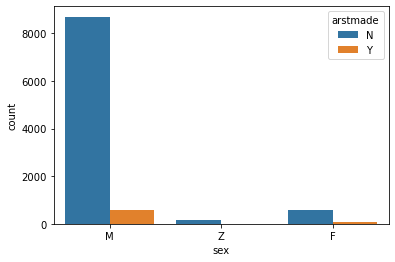

In [27]:
#gráfico de comportamiento
# ==================================================================================
sns.countplot(df_filtrado["sex"], hue = df_filtrado["arstmade"])
plt.show()

In [28]:
###################### Construir Modelo de regresión logística #####################

# Definir X y Y
# ==================================================================================
x = df_filtrado[["sex", "age"]]
x = pd.get_dummies(x, drop_first=True)
y = df_filtrado["arstmade"]
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
# ==================================================================================
model.fit(x, y)

#Obtener coeficientes
# ==================================================================================
coefficients = model.coef_
intercept = model.intercept_[0]

predictors = x.columns.tolist()
predictors.append("const")

coefficients = coefficients[0].tolist()
coefficients.append(intercept)

coef = pd.Series(coefficients, predictors).sort_values()

print(coef)

const   -2.544334
sex_Z   -0.572779
sex_M   -0.470923
age      0.009730
dtype: float64


La variable sex se relaciona de manera negativa con el target arstmade y la edad de manera positiva. Sin embargo, hay que considerar que para ver el efecto real es necesario obtener los odds.

Recodificar la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

In [29]:
reemplazo_target = {"N": 0, "Y":1} #definir valores de reemplazo
df_filtrado["arstmade"] = df_filtrado["arstmade"].replace(reemplazo_target) #realizar reemplazo de valores
df_filtrado["arstmade"].value_counts() #verificar el cambio

0    9432
1     646
Name: arstmade, dtype: int64

Gráfico de la probabilidad que un individuo sea arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

<Figure size 576x432 with 0 Axes>

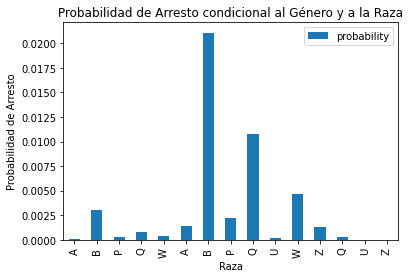

In [30]:
# Calcular la probabilidad condicional de arresto por género y raza
# ==================================================================================
probabilidad_condicional = df_filtrado.groupby(['sex', 'race'])['arstmade'].mean().reset_index()
probabilidad_condicional = probabilidad_condicional[probabilidad_condicional["arstmade"] != 0]

# Calcular las probabilidades previas de género y raza
# ==================================================================================
prob_prior_genero = df_filtrado['sex'].value_counts() / len(df_consolidado)
prob_prior_raza = df_filtrado['race'].value_counts() / len(df_consolidado)

# Combinar las probabilidades condicionales y previas
# ==================================================================================
prob_arresto_condicional = probabilidad_condicional.merge(prob_prior_genero.rename('prob_prior_genero'), 
                                                          left_on='sex', right_index=True)
prob_arresto_condicional = prob_arresto_condicional.merge(prob_prior_raza.rename('prob_prior_raza'), 
                                                          left_on='race', right_index=True)
prob_arresto_condicional['probability'] = prob_arresto_condicional['arstmade'] * prob_arresto_condicional['prob_prior_genero'] * prob_arresto_condicional['prob_prior_raza']
prob_arresto_condicional = prob_arresto_condicional.groupby(['sex', 'race'])['probability'].sum().reset_index()

# Crear el gráfico de barras
# ==================================================================================
plt.figure(figsize=(8, 6))
prob_arresto_condicional.plot(kind='bar', x='race', y='probability', stacked=True)

# Personalizar el gráfico
# ==================================================================================
plt.xlabel('Raza')
plt.ylabel('Probabilidad de Arresto')
plt.title('Probabilidad de Arresto condicional al Género y a la Raza')

# Mostrar el gráfico
plt.show()


El gráfico permite ver que hay una clara incidencia de las razas en la probabilidad de arresto. Lo que tiene implicancias éticas importantes, puesto esto puede deberse a factores como que las personas de ciertas razas están en desventajas en términos socio-económicos y por ello cometen más delitos o bien que las fuerzas policiales discriminan racialmente.

Se puede determinar si el procedimiento policial concluirá en alguna acción violenta. Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'], ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'. 

Generamos una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

In [31]:
# Crear la variable 'violencia'
# ==================================================================================
df_filtrado['violencia'] = (df_filtrado[['pf_hands', 'pf_wall', 'pf_grnd',
                                               'pf_drwep', 'pf_ptwep', 'pf_baton', 
                                               'pf_hcuff', 'pf_pepsp', 'pf_other']] == 'Y').any(axis=1).astype(int)

# Calcular el porcentaje de casos con violencia
# ==================================================================================
porcentaje_violencia = (df_filtrado['violencia'].sum() / len(df_filtrado)) * 100

print(f"Porcentaje de casos con violencia: {porcentaje_violencia:.4f}%")


Porcentaje de casos con violencia: 24.1814%


Generacion de las variables dummies correspondientes 

In [32]:
#Eliminar variables reduntantes
# ==================================================================================
df_modelado = df_filtrado.drop(['pf_hands', 'pf_wall', 'pf_grnd',
                                  'pf_drwep', 'pf_ptwep', 'pf_baton', 
                                  'pf_hcuff', 'pf_pepsp', 'pf_other'], axis = 1)

df_modelado.head(5)

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,addrtyp,city,sector,beat,dettypcm,Mes,meters,Año,age,violencia
0,A,O,P,P,Y,N,0,N,Y,N,...,L,BRONX,G,7,CM,4,4.2672,2009,24,0
2,1,O,P,V,Y,N,0,N,N,N,...,L,BRONX,E,U,CM,10,2.7432,2009,21,0
3,A,O,P,P,Y,N,0,N,Y,N,...,L,BROOKLYN,J,4,CM,12,3.0480,2009,22,0
4,A,O,P,P,Y,Y,0,N,Y,N,...,L,QUEENS,H,U,CM,12,3.3528,2009,18,0
5,1,I,T,V,Y,N,0,N,N,I,...,L,MANHATTAN,F,16,CM,5,3.9624,2009,47,0


In [33]:
#transformar variable violencia a categoria
# ==================================================================================
df_modelado["violencia"] = df_modelado["violencia"].apply(str) 

In [34]:
#transformar a dummy
# ==================================================================================
df_modelado = pd.get_dummies(df_modelado, drop_first=True)
df_modelado.head(5)

,arstmade,Mes,meters,Año,age,recstat_A,inout_O,trhsloc_P,trhsloc_T,trhsloc_U,...,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U,dettypcm_CM,violencia_1
0,0,4,4.2672,2009,24,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,10,2.7432,2009,21,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,12,3.0480,2009,22,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,12,3.3528,2009,18,1,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
5,0,5,3.9624,2009,47,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
#Dividir en train y test
# ==================================================================================
train = df_modelado[df_modelado["Año"] == 2009]
test = df_modelado[df_modelado["Año"] == 2010]

print(f"El dataset de entrenamiento está contiene {train.shape[0]} filas y {train.shape[1]} columnas")
print("----------------------------------------------")
print(f"El dataset de entrenamiento está contiene {test.shape[0]} filas y {test.shape[1]} columnas")

El dataset de entrenamiento está contiene 4987 filas y 184 columnas
----------------------------------------------
El dataset de entrenamiento está contiene 5091 filas y 184 columnas


Entrenamiento de 2 modelos de clasificación y reporte el mejor modelo bajo algún criterio.

In [36]:
####################### Separar el dataset en data y target #######################
#==================================================================================

#Train
#==================================================================================
X_train = train.drop(["arstmade"], axis = 1)
y_train = train["arstmade"]

#Test
#==================================================================================
X_test = test.drop(["arstmade"], axis = 1)
y_test = test["arstmade"]

In [37]:
###################### Ajuste del modelo  Regresión Logística #####################

# Crear modelo de regresión logística
#==================================================================================
model_rl = LogisticRegression(max_iter=1000)

# Entrenar el modelo
#==================================================================================
model_rl.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

-----------------------------------
Métricas de Evaluación de Desempeño
-----------------------------------
Accuracy: 0.9641
F1 Score: 0.6817


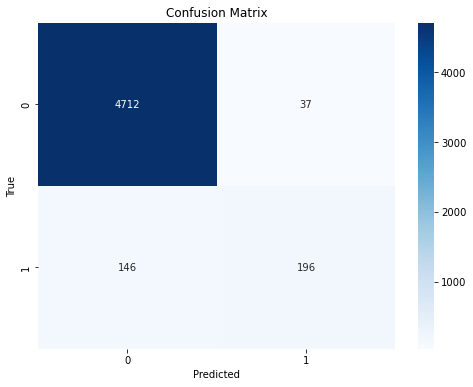

In [38]:
###################### Predicciones y Evaluación del Modelo #####################

# Realizar predicciones sobre la data de testeo
#==================================================================================
y_pred = model_rl.predict(X_test)

# Obtener Accuracy y F1_score
# ==============================================================================
print("-----------------------------------")
print("Métricas de Evaluación de Desempeño")
print("-----------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Generate the confusion matrix
# ==============================================================================
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, cmap="Blues", fmt="d", ax=ax
)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

In [39]:
####################### Ajuste del modelo Gradient Boosting #######################

# Crear modelo de Gradient Boosting
#==================================================================================
clf = GradientBoostingClassifier()

# Entrenar el modelo
#==================================================================================
clf.fit(X_train, y_train)

GradientBoostingClassifier()

-----------------------------------
Métricas de Evaluación de Desempeño
-----------------------------------
Accuracy: 0.9623
F1 Score: 0.6768


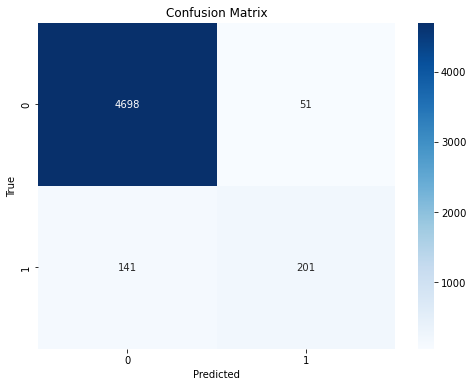

In [40]:
###################### Predicciones y Evaluación del Modelo #####################

# Realizar predicciones sobre la data de testeo
#==================================================================================
y_pred_clf = clf.predict(X_test)

# Obtener Accuracy y F1_score
# ==============================================================================
print("-----------------------------------")
print("Métricas de Evaluación de Desempeño")
print("-----------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_clf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_clf):.4f}")

# Generate the confusion matrix
# ==============================================================================
cm = confusion_matrix(y_test, y_pred_clf)

# Plot the confusion matrix
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, cmap="Blues", fmt="d", ax=ax
)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

Para poder reportar cuál de los dos modelos entrenados se deben considerar métricas de desempeño, para estos efectos se calculó **Accuracy** y **F1 Score**. Con los siguientes resultados:

$$
\text{Regresión Logística}
\begin{cases}
Accuracy = 0.9641\\
\text{F1 Score} = 0.6817
\end{cases}
$$

$$
\text{Gadient Boosting}
\begin{cases}
Accuracy = 0.9629\\
\text{F1 Score} = 0.6813
\end{cases}
$$

Dado estos resultados el mejor modelo es la **Regresión Logística** ya que en ambas métricas presenta un mejor desempeño.

**Bonus: ¿Qué se puede hacer para mejorar la predicción de los modelos?**

Para mejorar la predicción de los modelos se pueden aplicar distintas técnicas como:
1. **Manejo de los valores atípicos:** puesto que modelos de máxima verosimilitud son altamente sencibles a ellos.
2. **Selección de variables:** Identificar y seleccionar solamente aquellas características relevantes mejoran el rendimiento, ya que se obvia la maldición de la dimensionalidad.
3. **Ingeniería de Atributos:** Realizar transformaciones como escalas logarítmicas, estandarización, normalización (min-max) o reducción de dimensiones (ej: PAC) puede ayudar a capturar de mejor manera los patrones.
4. **Optimización de Hiperparámetros:** Ajustar los hiperparámetros puede mejorar el rendimiento y evitar el sobreajuste o subajuste.